In [283]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [284]:
# Step 1: Data Reading And Understanding
carprice = pd.read_csv('CarPrice_Assignment.csv')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [285]:
# Make Car-ID as index
carprice.set_index('car_ID', inplace=True)

In [286]:
carprice.shape

(205, 25)

In [287]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [288]:
carprice.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [289]:
# Data Visualization
# Visualizing Numerical Data
import matplotlib.pyplot as plt
import seaborn as sns

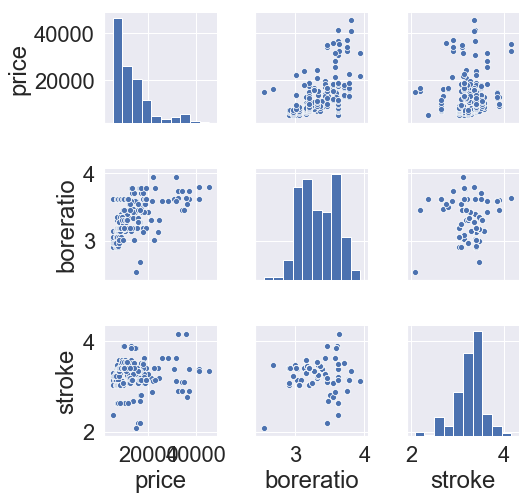

In [290]:
sns.pairplot(carprice[['price','boreratio','stroke']])
plt.show()

In [291]:
carprice[['boreratio', 'price']].corr()

,boreratio,price
boreratio,1.000000,0.553173
price,0.553173,1.000000


In [292]:
carprice[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.079443
price,0.079443,1.000000


Stroke and bore-ratio are somewhat similar variables. Infact boreratio, uses stroke value. We also see it's positive correlation with price. Hence, we can discard 'stroke' as a feature.

In [293]:
# Let's create a definition to create some scatter sub-plots
def scatter(x,axes):
    sns_plot = sns.scatterplot(carprice[x],carprice['price'], ax = axes)
    sns_plot.set(xlabel=x, ylabel='Price', title=x + ' vs Price')

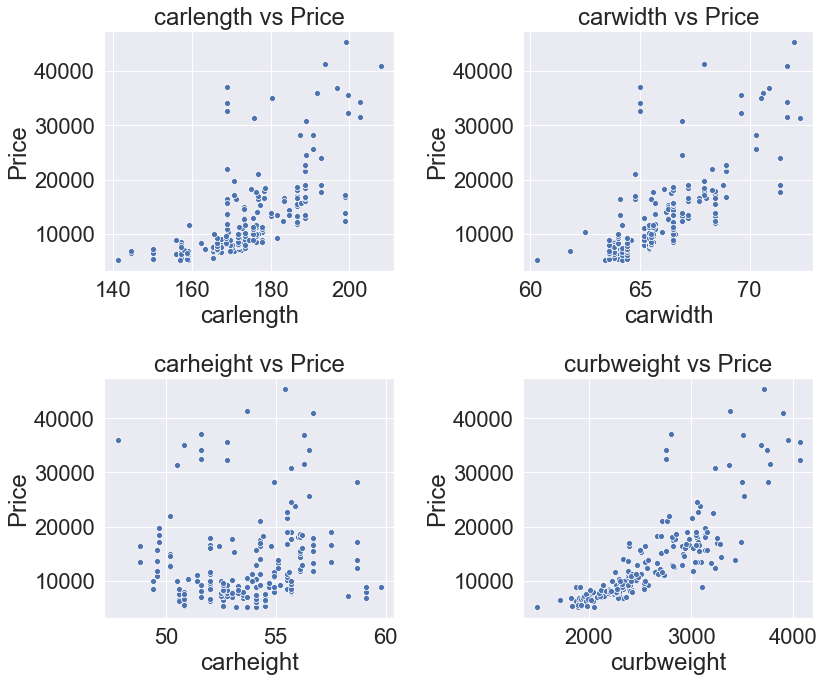

In [294]:
# plt.figure(figsize=(12,20))
f, axes = plt.subplots(2, 2, figsize=(12, 10))
scatter('carlength', axes[0,0])
scatter('carwidth', axes[0,1])
scatter('carheight', axes[1,0])
scatter('curbweight', axes[1,1])

plt.tight_layout()

From the above scatterplot, we can see that 'curbweight', 'carlength', and 'cardwidth' influence the car price. However, 'carheight' doesn't seem to be an influential factor. 

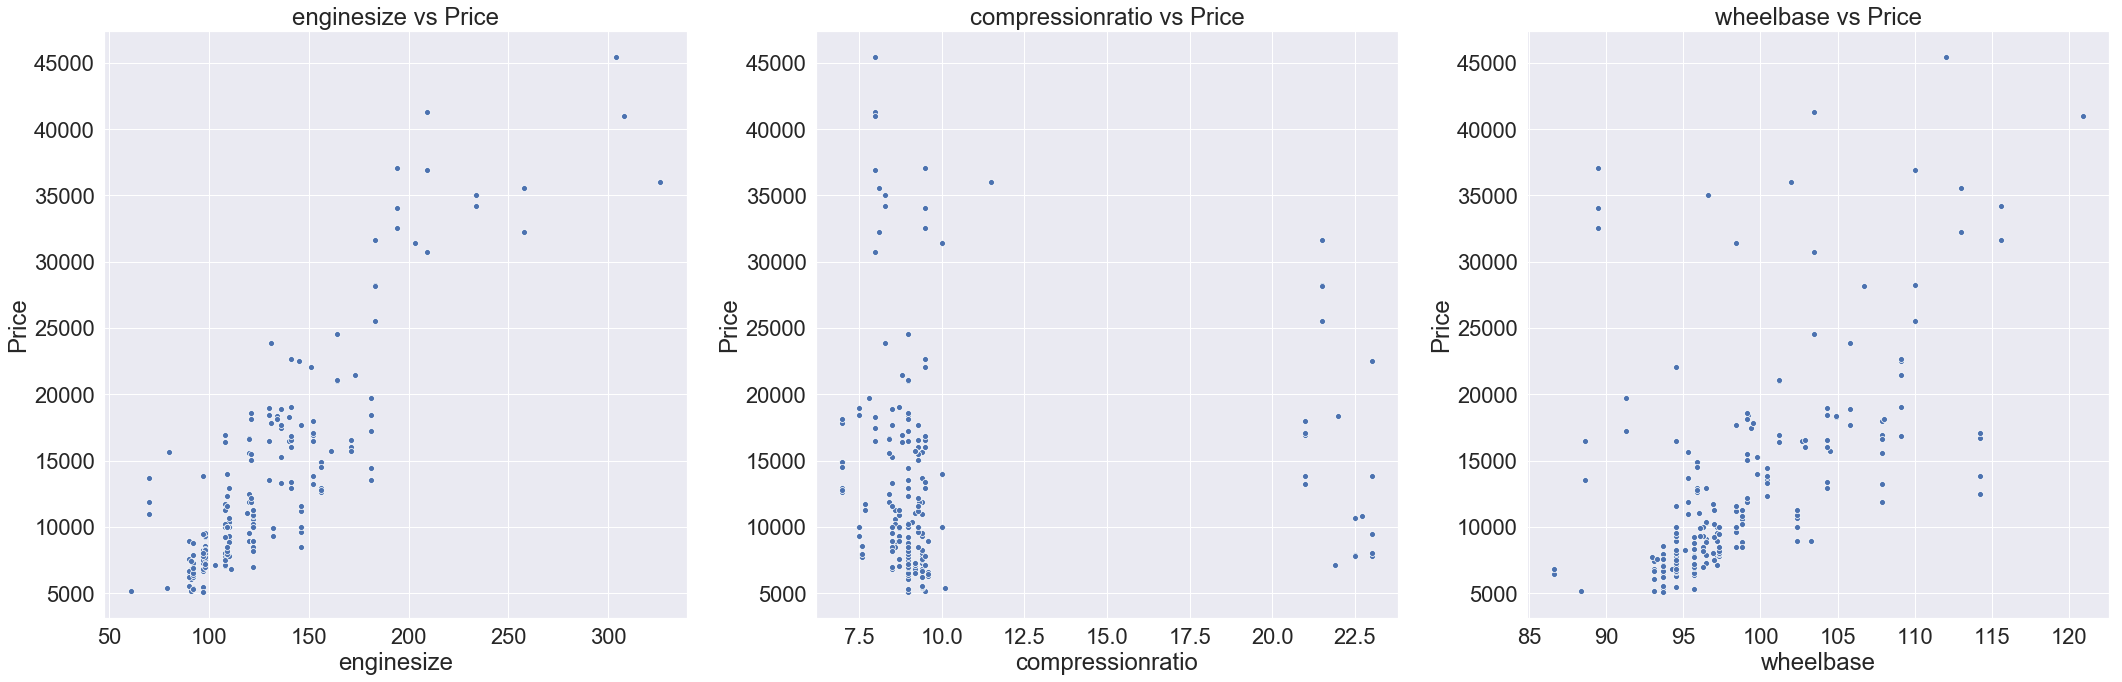

In [295]:
# Scatter plots for engine size and compression ratio
f2, axes2 = plt.subplots(1, 3, figsize=(30, 10))
scatter('enginesize', axes2[0])
scatter('compressionratio', axes2[1])
scatter('wheelbase', axes2[2])
plt.tight_layout()

It's clear from the above plot that enginesize and wheelbase seem to be collinear with price. We can discard compressionratio as a feature. 

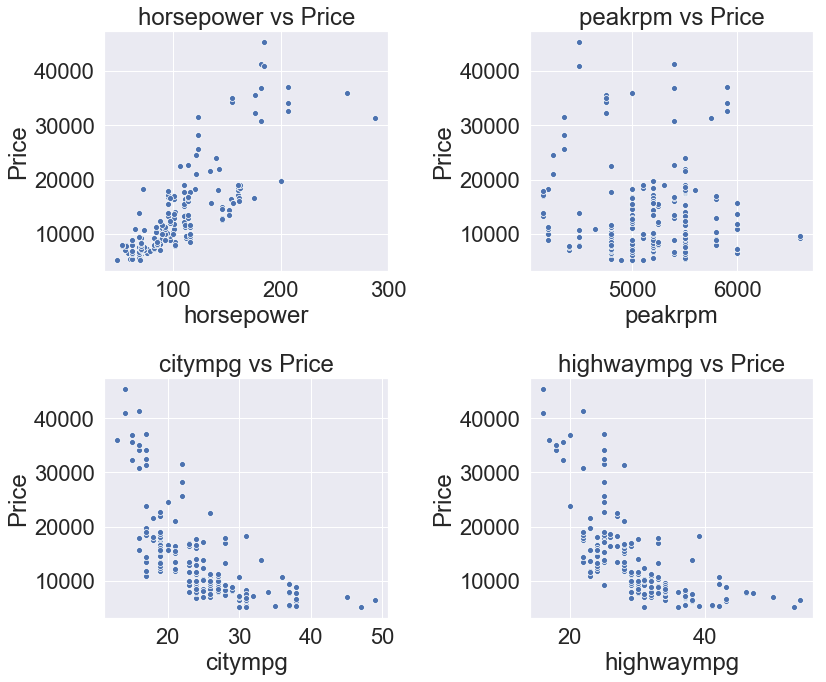

In [296]:
# Scatter plots for horsepower, peakrpm, citympg, highwaympg
f3, axes3 = plt.subplots(2, 2, figsize=(12, 10))

scatter('horsepower', axes3[0,0])
scatter('peakrpm', axes3[0,1])
scatter('citympg', axes3[1,0])
scatter('highwaympg', axes3[1,1])

plt.tight_layout()

Horse-power seems to be positively related with the price. On the other hand, citympg and highwaympg seem to be negatively correlated with price. The 'peakrpm' feature doesn't seem to be of any significance. 

In [297]:
# Maybe we can derive a new feature by computing the average between individual higwhaympg and city mpg for each car
carprice['avg_mpg'] = [(carprice.loc[i,'highwaympg'] + carprice.loc[i,'citympg'])/2 for i in range(1, len(carprice.index) + 1)]

In [298]:
carprice[['avg_mpg','highwaympg','citympg']].head()

,avg_mpg,highwaympg,citympg
car_ID,,,
1,24.0,27,21
2,24.0,27,21
3,22.5,26,19
4,27.0,30,24
5,20.0,22,18


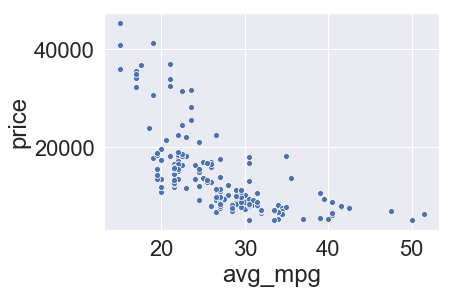

In [299]:
sns.scatterplot(carprice['avg_mpg'],carprice['price'])

As expected, the avg_mpg column also seems to be negatively correlated with price. 

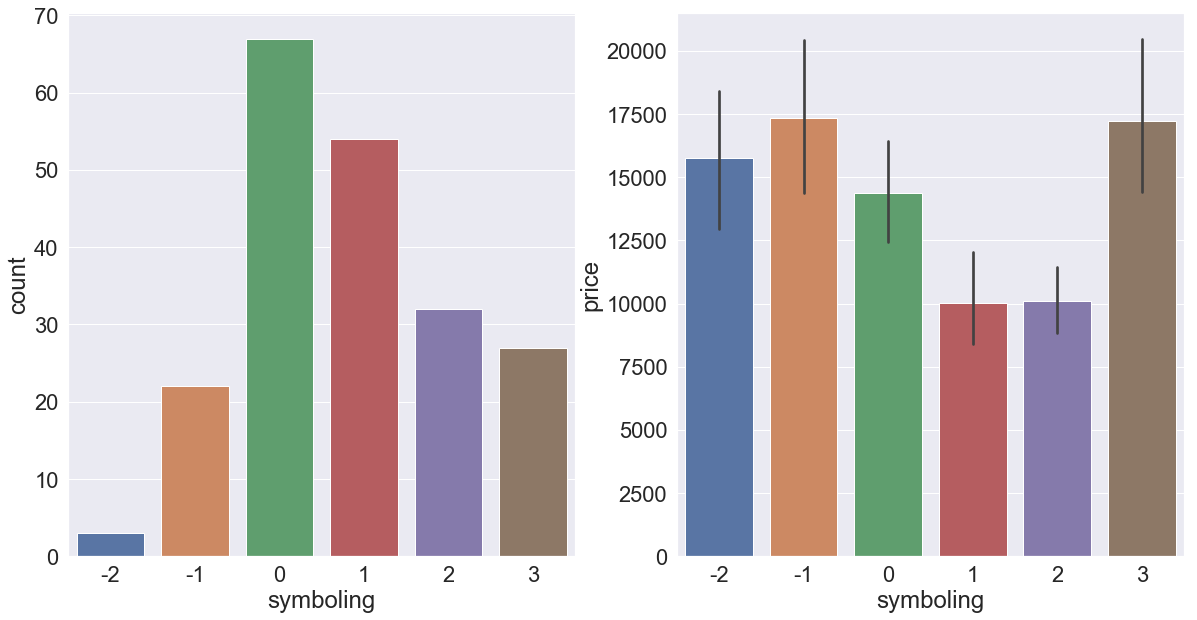

In [300]:
# Visualizing categorical variables
# Let's visualize symboling first
fc1, axes_c1 = plt.subplots(1, 2, figsize=(20, 10))
sns.set(style="darkgrid")
sns.countplot(carprice['symboling'], ax = axes_c1[0])
sns.barplot(carprice['symboling'],carprice['price'], ax = axes_c1[1])

In the countplot, we see majority of car purchases pertaining to '0' and '1' category in 'Symboling'. 
On the other hand, from the 2nd plot we can infer that the relationship of symboling doesn't seem to be linear with price. However, we can see a significant drop in price for '1' and '2' in the symboling category

In [301]:
# Extracting car_company
car_company = carprice['CarName'].apply(lambda x : x.split()[0])
carprice['car_company'] = car_company
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg,car_company
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0,alfa-romero
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0,alfa-romero
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5,alfa-romero
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0,audi
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0,audi


In [302]:
carprice['car_company'].unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Seems like there are some redundant values. We have to rectify some mistakes in the company names. 

In [303]:
carprice['car_company'] = carprice['car_company'].str.lower()
carprice['car_company'].unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [304]:
# Definition to replace the values
def replace_val(a,b):
    carprice['car_company'].replace(a,b,inplace=True)

In [305]:
replace_val('maxda','mazda')
replace_val('porcshce','porsche')
replace_val('toyouta','toyota')
replace_val('vokswagen','volkswagen')
replace_val('vw','volkswagen')
carprice['car_company'].unique() 

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [306]:
# Let's create a definition for box plot, count-plot and bar-plot of some categorical variables
def count_box_bar(x,axes, grp_sorted):
    sns_count = sns.countplot(carprice[x],ax = axes[0])
    sns.set(font_scale = 2)
    sns_count.set(xlabel=x, title=x + ' Count_Plot')
    sns_box = sns.boxplot(carprice[x],carprice['price'], ax = axes[1])
    sns_box.set(xlabel=x, ylabel='Price', title=x + ' vs Price')
    sns_bar = sns.barplot(carprice[x],carprice['price'],order = grp_sorted[x], ax = axes[2])
    sns_bar.set(xlabel=x, ylabel='Avg. Price', title=x + ' vs Avg. Price')

In [307]:
# Grouping by carbody and using 'mean' of price as an aggregator to sort values
carbody_price = carprice.groupby(["carbody"])['price'].aggregate(np.mean).reset_index().sort_values('price')

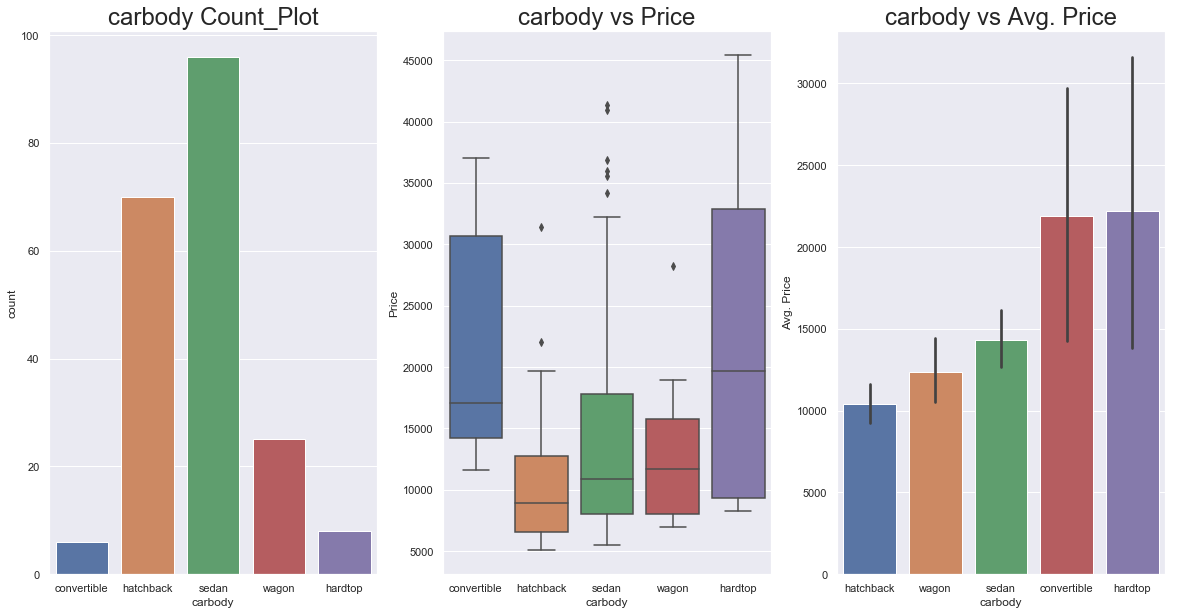

In [308]:
fc2, axes_c2 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('carbody', axes_c2, carbody_price)

From the above plots, we can infer:
1. Most of the purchases are centered around hatchback and sedan (refer countplot)
2. Convertible and hardtop seem to be the most expensive cars, and equally have the lowest purchases.
3. The price seems to vary linearly with carbody

Hence, this can be one of the influential factors

In [309]:
# Grouping by drivewheel and using 'mean' of price as an aggregator to sort values
drvwhl_price = carprice.groupby(["drivewheel"])['price'].aggregate(np.mean).reset_index().sort_values('price')

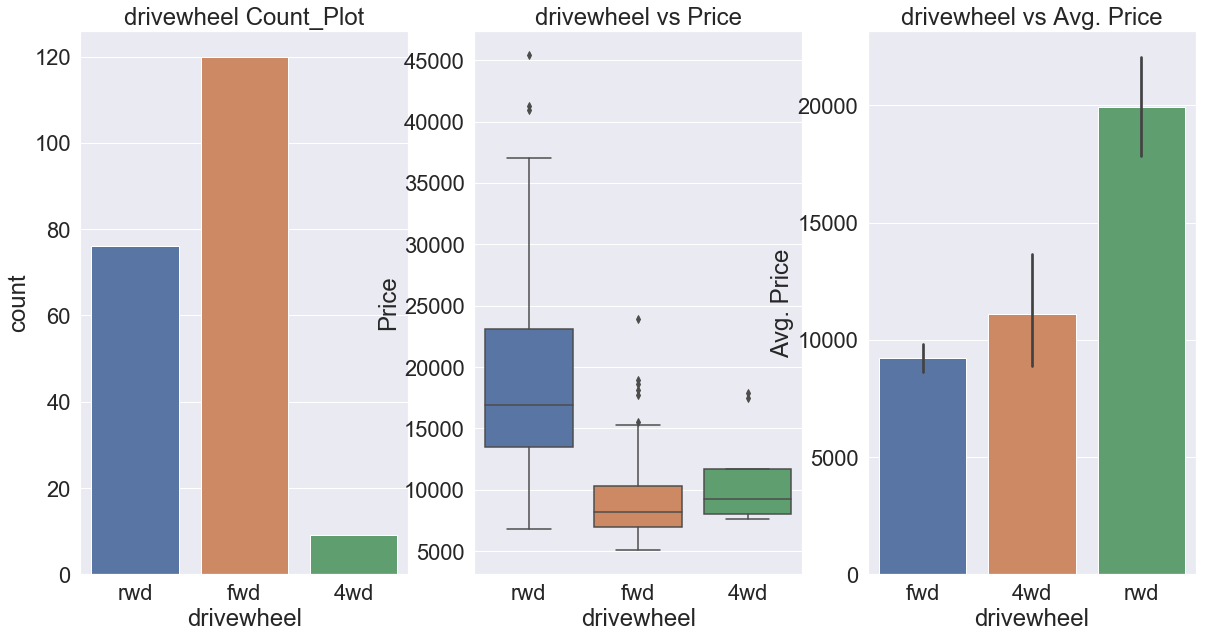

In [310]:
fc3, axes_c3 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('drivewheel', axes_c3, drvwhl_price)

From the above plots we can conclude:
1. 'fwd' drivewheel type has the most number of purchases, possibly due to its lowest price
2. 'rwd' or 'Reverse-Wheel' drivewheel type is the most expensive but still has good amount of purchases, probably because of popularity. 
3. '4wd' or 'Four Wheel Drive' type seems to have the least number of purchases. It could be possible because of less people prefer to purchase 4wd vehicles like trucks, SUVs, etc. (optimized primarily for off-road travel)
4. There seems to be a linear relationship between 'drivewheel' and 'price'. Hence, it could be significant for us. 

In [311]:
 # Grouping by enginetype and using 'mean' of price as an aggregator to sort values
egtype_price = carprice.groupby(["enginetype"])['price'].aggregate(np.mean).reset_index().sort_values('price')

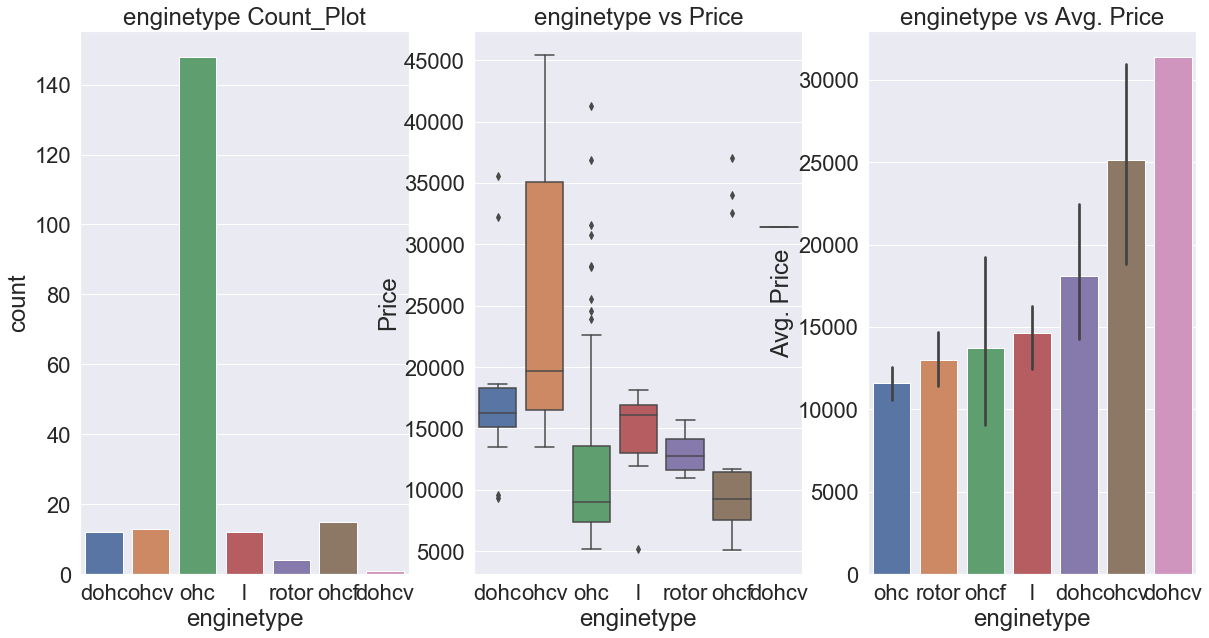

In [312]:
fc4, axes_c4 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('enginetype', axes_c4, egtype_price)

In [313]:
# Grouping by cylindernumber and using 'mean' of price as an aggregator to sort values
cyln_price = carprice.groupby(["cylindernumber"])['price'].aggregate(np.mean).reset_index().sort_values('price')

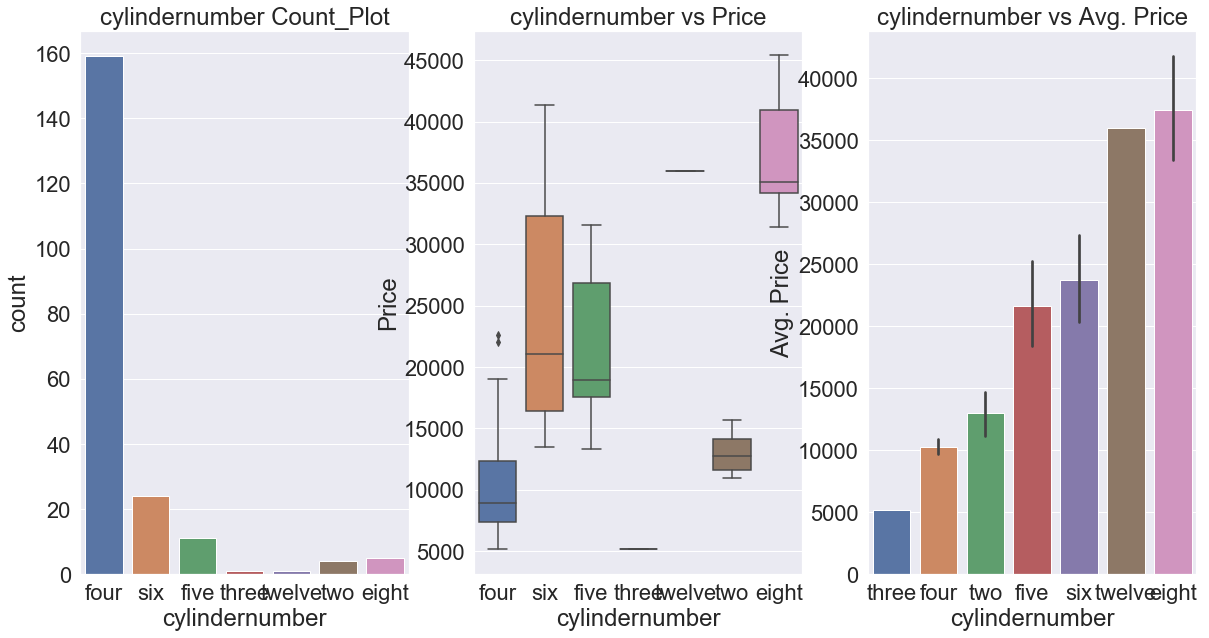

In [314]:
fc5, axes_c5 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('cylindernumber', axes_c5, cyln_price)

In [315]:
# Grouping by fuelsystem and using 'mean' of price as an aggregator to sort values
flsys_price = carprice.groupby(["fuelsystem"])['price'].aggregate(np.mean).reset_index().sort_values('price')

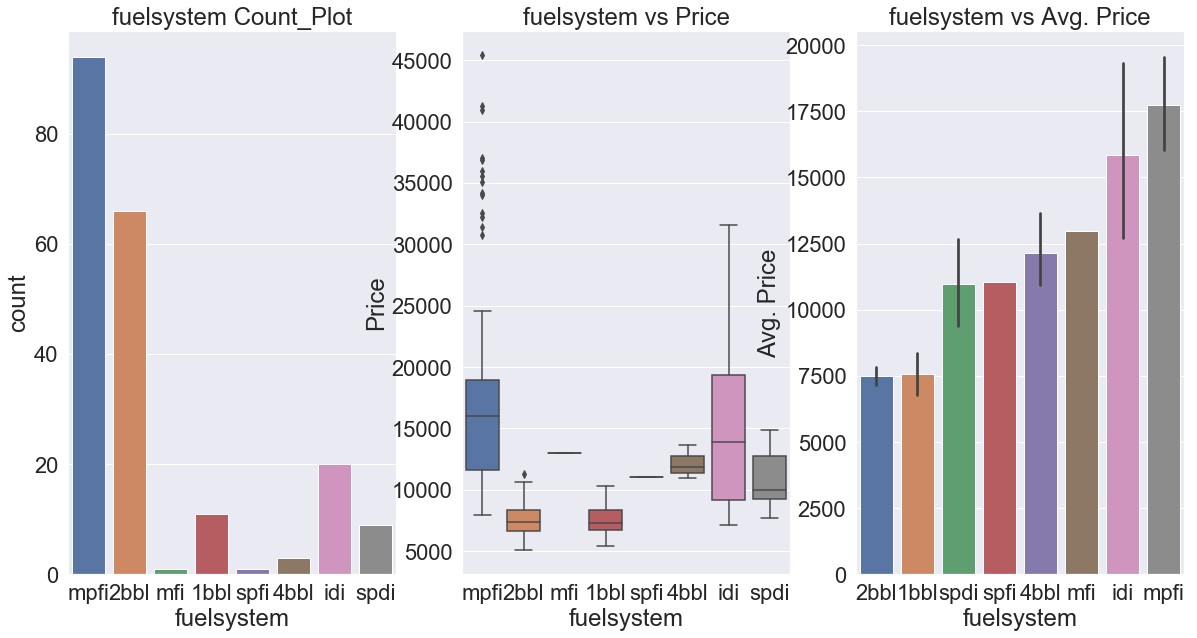

In [316]:
fc6, axes_c6 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('fuelsystem', axes_c6, flsys_price)

In [317]:
# Grouping by doornumber and using 'mean' of price as an aggregator to sort values
dnum_price = carprice.groupby(["doornumber"])['price'].aggregate(np.mean).reset_index().sort_values('price')

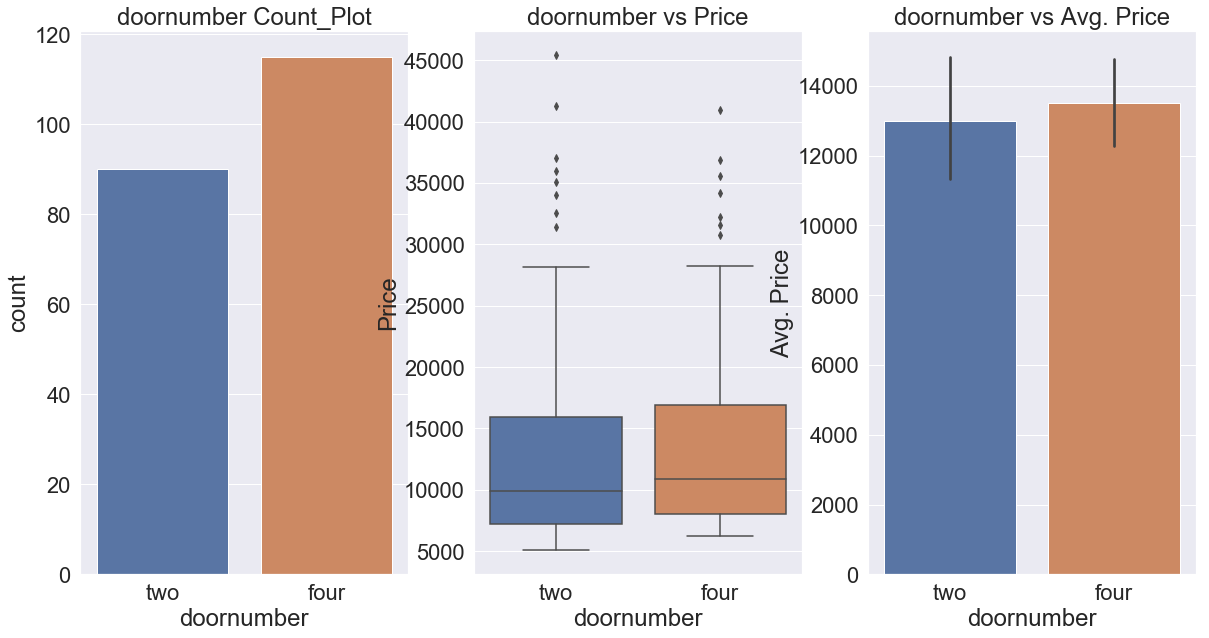

In [318]:
fc7, axes_c7 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('doornumber', axes_c7, dnum_price)

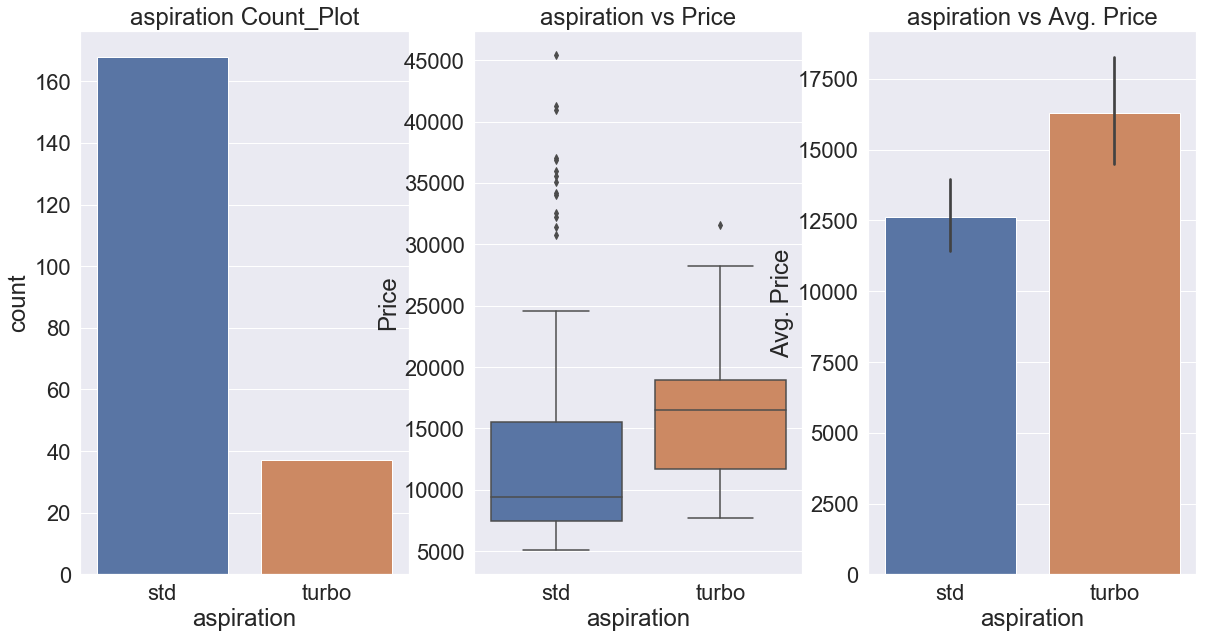

In [319]:
# Grouping by aspiration and using 'mean' of price as an aggregator to sort values
asp_price = carprice.groupby(["aspiration"])['price'].aggregate(np.mean).reset_index().sort_values('price')
fc8, axes_c8 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('aspiration', axes_c8, asp_price)

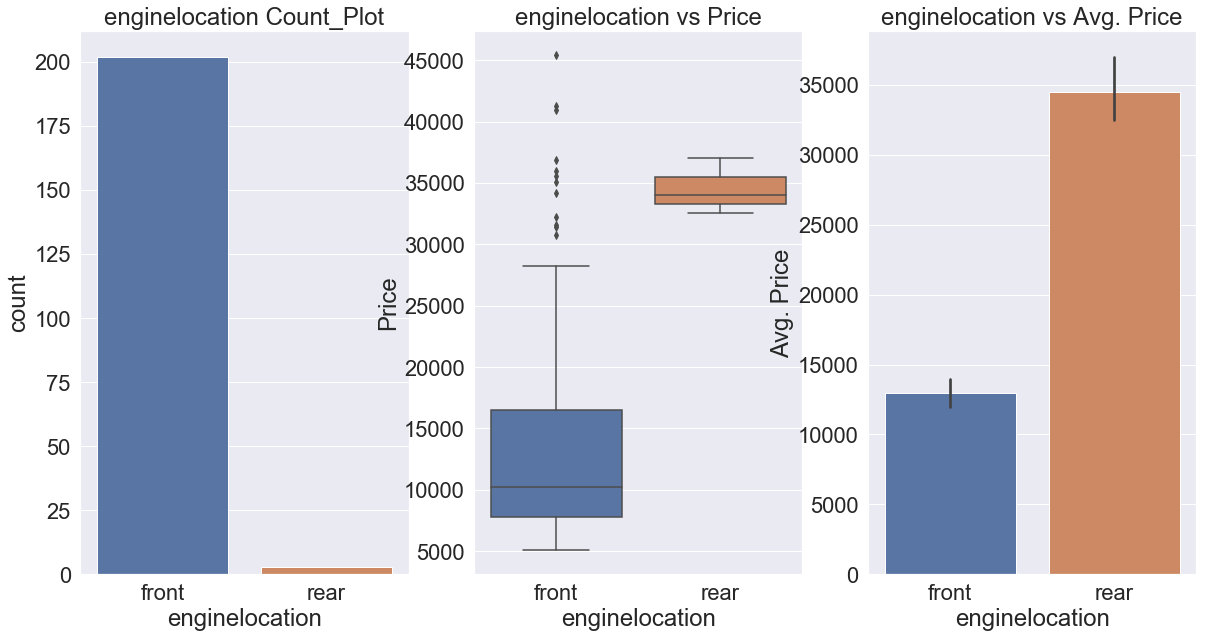

In [320]:
# Grouping by enginelocation and using 'mean' of price as an aggregator to sort values
egloc_price = carprice.groupby(["enginelocation"])['price'].aggregate(np.mean).reset_index().sort_values('price')
fc9, axes_c9 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('enginelocation', axes_c9, egloc_price)

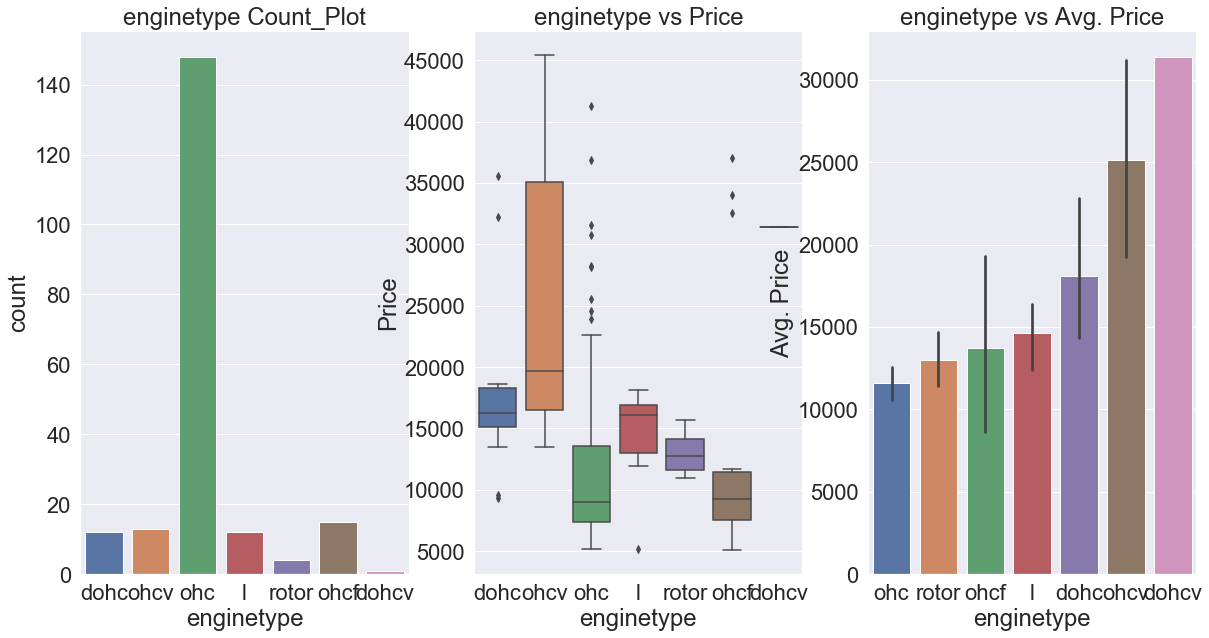

In [321]:
# Grouping by enginetype and using 'mean' of price as an aggregator to sort values
egtype_price = carprice.groupby(["enginetype"])['price'].aggregate(np.mean).reset_index().sort_values('price')
fc10, axes_c10 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('enginetype', axes_c10, egtype_price)

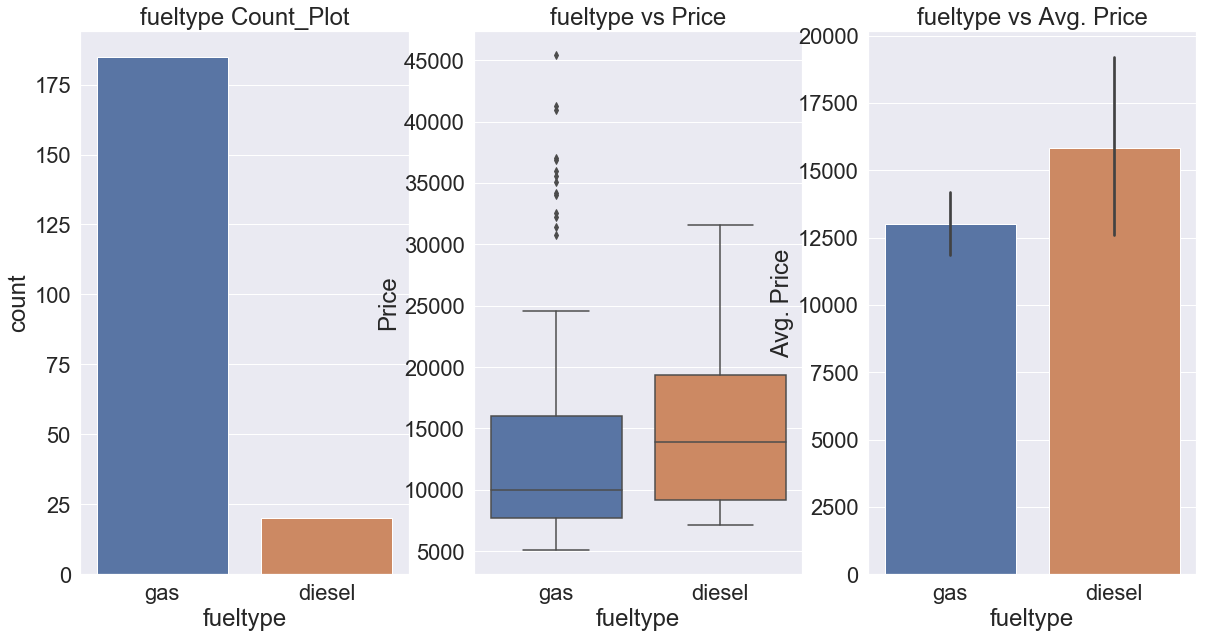

In [322]:
# Grouping by fueltype and using 'mean' of price as an aggregator to sort values
fltype_price = carprice.groupby(["fueltype"])['price'].aggregate(np.mean).reset_index().sort_values('price')
fc11, axes_c11 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('fueltype', axes_c11, fltype_price)

[Text(0, 0.5, 'Avg. Price'),
 Text(0.5, 0, 'car_company'),
 Text(0.5, 1.0, 'car_company vs Avg. Price')]

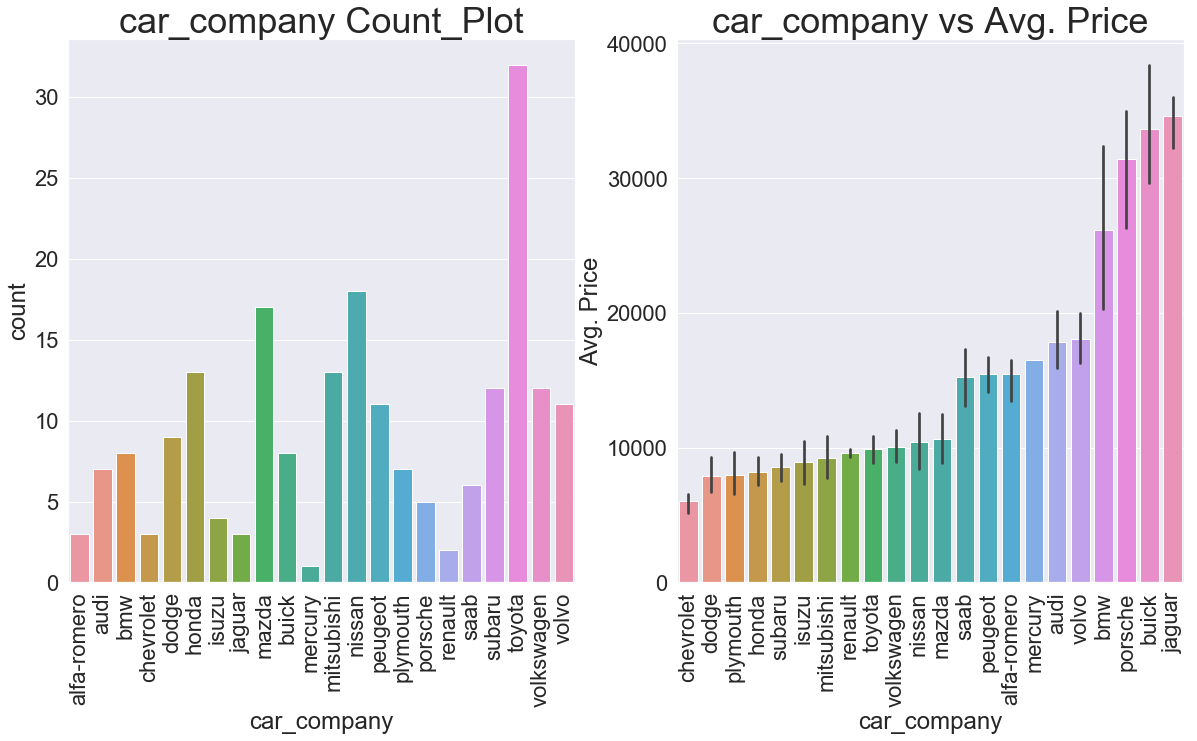

In [323]:
# Grouping by company_name and using 'mean' of price as an aggregator to sort values
company_price = carprice.groupby(["car_company"])['price'].aggregate(np.mean).reset_index().sort_values('price')
x = 'car_company'

fc12, axes_c12 = plt.subplots(1, 2, figsize=(20, 10))
sns.set(font_scale = 3)
sns_count = sns.countplot(carprice[x],ax = axes_c12[0])

sns_count.set_xticklabels(sns_count.get_xticklabels(), rotation=90)
sns_count.set(xlabel=x, title=x + ' Count_Plot')

sns_bar = sns.barplot(carprice[x],carprice['price'],order = company_price[x], ax = axes_c12[1])
sns_bar.set_xticklabels(sns_bar.get_xticklabels(), rotation=90)
sns_bar.set(xlabel=x, ylabel='Avg. Price', title=x + ' vs Avg. Price')

In [339]:
# The above plot highlights
carprice['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [340]:
carprice['price'].unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 17859,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7895,
        9095,  8845, 10295, 12945, 10345,  6785,  8916, 11048, 32250,
       35550, 36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845,
       13645, 15645,  8495, 10595, 10245, 10795, 11245, 18280, 18344,
       25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400, 16503,
        5389,  6189,  6669,  7689,  9959,  8499, 12629, 14869, 14489,
        6989,  8189,  9279,  5499,  7099,  6649,  6849,  7349,  7299,
        7799,  7499,  7999,  8249,  8949,  9549, 13499, 14399, 17199,
       19699, 18399, 11900, 13200, 12440, 13860, 15580, 16900, 16695,
       17075, 16630, 17950, 18150, 12764, 22018, 32528, 34028, 37028,
       31400,  9295,  9895, 11850, 12170, 15040, 15510, 18620,  5118,
        7053,  7603,

In [325]:
#Binning the Car Companies based on avg prices of each Company
carprice['price'] = carprice['price'].astype('int')
tmp = carprice.copy()
table = tmp.groupby(['car_company'])['price'].mean()
tmp = tmp.merge(table.reset_index(), how='left',on='car_company')
bins = [0,10000,20000,40000]
cars_bin=['LowEnd','MidRange','HighEnd']
# Creating a price-range column to counter too many dummy variables for company names
carprice['price-range'] = pd.cut(tmp['price_y'],bins,right=False,labels=cars_bin)
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg,car_company,price-range
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,24.0,alfa-romero,MidRange
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,24.0,alfa-romero,MidRange
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,22.5,alfa-romero,MidRange
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,27.0,audi,MidRange
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,20.0,audi,MidRange


In [342]:
carprice[carprice.price.isna()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg,car_company,price-range
car_ID,,,,,,,,,,,,,,,,,,,,,


In [343]:
carprice[carprice['price-range'].isna()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg,car_company,price-range
car_ID,,,,,,,,,,,,,,,,,,,,,
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,19,25,22625,22.0,volvo,NaN


In [344]:
carprice.loc[205,'price-range'] = 'HighEnd'

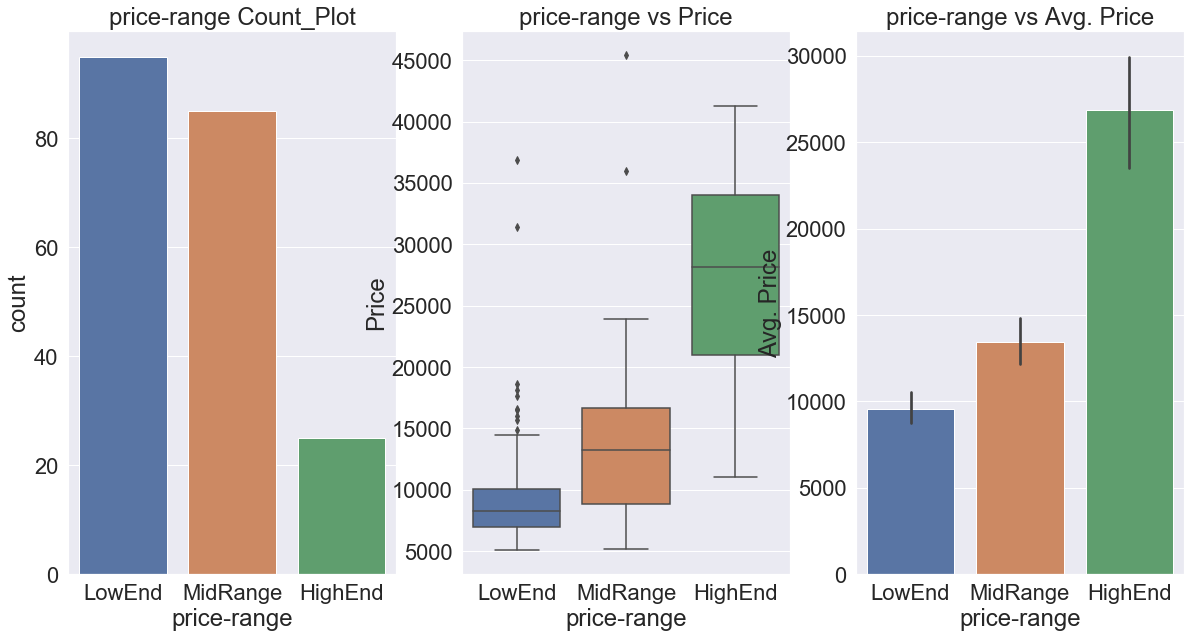

In [345]:
# Grouping by price-range and using 'mean' of price as an aggregator to sort values
range_price = carprice.groupby(["price-range"])['price'].aggregate(np.mean).reset_index().sort_values('price')
fc21, axes_21 = plt.subplots(1, 3, figsize=(20, 10))
count_box_bar('price-range', axes_21, range_price)

In [371]:
# Data Preparation
# Important variables that we disocovered are : boreratio, curbweight, carlength, carwidth, enginesize, wheelbase, 
# horse-power, avg_mpg, carbody, drivewheel, enginetype, cylindernumber, aspiration, enginetype, fueltype, price-range
carprice_lr = carprice[['curbweight', 'carlength', 'carwidth','boreratio', 'enginesize', 
               'wheelbase', 'horsepower', 'avg_mpg', 'carbody', 'drivewheel','cylindernumber', 
               'aspiration', 'enginetype', 'fueltype', 'price-range', 'price']]
carprice_lr.head()

,curbweight,carlength,carwidth,boreratio,enginesize,wheelbase,horsepower,avg_mpg,carbody,drivewheel,cylindernumber,aspiration,enginetype,fueltype,price-range,price
car_ID,,,,,,,,,,,,,,,,
1,2548,168.8,64.1,3.47,130,88.6,111,24.0,convertible,rwd,four,std,dohc,gas,MidRange,13495
2,2548,168.8,64.1,3.47,130,88.6,111,24.0,convertible,rwd,four,std,dohc,gas,MidRange,16500
3,2823,171.2,65.5,2.68,152,94.5,154,22.5,hatchback,rwd,six,std,ohcv,gas,MidRange,16500
4,2337,176.6,66.2,3.19,109,99.8,102,27.0,sedan,fwd,four,std,ohc,gas,MidRange,13950
5,2824,176.6,66.4,3.19,136,99.4,115,20.0,sedan,4wd,five,std,ohc,gas,MidRange,17450


In [372]:
carprice_lr.columns

Index(['curbweight', 'carlength', 'carwidth', 'boreratio', 'enginesize',
       'wheelbase', 'horsepower', 'avg_mpg', 'carbody', 'drivewheel',
       'cylindernumber', 'aspiration', 'enginetype', 'fueltype', 'price-range',
       'price'],
      dtype='object')

In [373]:
# Creating Dummy Variables for Nominal Categories
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the carprice_lr

carprice_lr = dummies('carbody',carprice_lr)
carprice_lr = dummies('fueltype',carprice_lr)
carprice_lr = dummies('aspiration',carprice_lr)
carprice_lr = dummies('drivewheel',carprice_lr)
carprice_lr = dummies('enginetype',carprice_lr)

In [374]:
carprice_lr.head()

,curbweight,carlength,carwidth,boreratio,enginesize,wheelbase,horsepower,avg_mpg,cylindernumber,price-range,...,gas,turbo,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2548,168.8,64.1,3.47,130,88.6,111,24.0,four,MidRange,...,1,0,0,1,0,0,0,0,0,0
2,2548,168.8,64.1,3.47,130,88.6,111,24.0,four,MidRange,...,1,0,0,1,0,0,0,0,0,0
3,2823,171.2,65.5,2.68,152,94.5,154,22.5,six,MidRange,...,1,0,0,1,0,0,0,0,1,0
4,2337,176.6,66.2,3.19,109,99.8,102,27.0,four,MidRange,...,1,0,1,0,0,0,1,0,0,0
5,2824,176.6,66.4,3.19,136,99.4,115,20.0,five,MidRange,...,1,0,0,0,0,0,1,0,0,0


In [375]:
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('four',4,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('five',5,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('three',3,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('six',6,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('eight',8,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('twelve',12,inplace=False)
carprice_lr['cylindernumber'] = carprice_lr['cylindernumber'].replace('two',2,inplace=False)

In [376]:
carprice_lr.head()

,curbweight,carlength,carwidth,boreratio,enginesize,wheelbase,horsepower,avg_mpg,cylindernumber,price-range,...,gas,turbo,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2548,168.8,64.1,3.47,130,88.6,111,24.0,4,MidRange,...,1,0,0,1,0,0,0,0,0,0
2,2548,168.8,64.1,3.47,130,88.6,111,24.0,4,MidRange,...,1,0,0,1,0,0,0,0,0,0
3,2823,171.2,65.5,2.68,152,94.5,154,22.5,6,MidRange,...,1,0,0,1,0,0,0,0,1,0
4,2337,176.6,66.2,3.19,109,99.8,102,27.0,4,MidRange,...,1,0,1,0,0,0,1,0,0,0
5,2824,176.6,66.4,3.19,136,99.4,115,20.0,5,MidRange,...,1,0,0,0,0,0,1,0,0,0


In [377]:
carprice_lr.columns

Index(['curbweight', 'carlength', 'carwidth', 'boreratio', 'enginesize',
       'wheelbase', 'horsepower', 'avg_mpg', 'cylindernumber', 'price-range',
       'price', 'hardtop', 'hatchback', 'sedan', 'wagon', 'gas', 'turbo',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [378]:
# Applying LabelEncoder for Ordinal Categorical Variables: pricerange
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [333]:
#carprice_lr['price-range'] = carprice_lr['price-range'].astype(str)

In [379]:
carprice_lr['price-range'].unique()

[MidRange, HighEnd, LowEnd]
Categories (3, object): [LowEnd < MidRange < HighEnd]

In [380]:
carprice_lr['pricerange_cat'] = labelencoder.fit_transform(carprice_lr['price-range'])
carprice_lr['pricerange_cat'].unique()

array([2, 0, 1], dtype=int64)

In [395]:
carprice_lr = carprice_lr.drop('price-range', axis = 1)

In [396]:
carprice_lr.columns

Index(['curbweight', 'carlength', 'carwidth', 'boreratio', 'enginesize',
       'wheelbase', 'horsepower', 'avg_mpg', 'cylindernumber', 'price',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'gas', 'turbo', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'pricerange_cat'],
      dtype='object')

In [397]:
# Splitting the dataset to train and test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(carprice_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [398]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','cylindernumber','avg_mpg','carlength','carwidth','price']
df_train[vars] = scaler.fit_transform(df_train[vars])

c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\amlan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [399]:
df_train.head()

,curbweight,carlength,carwidth,boreratio,enginesize,wheelbase,horsepower,avg_mpg,cylindernumber,price,...,turbo,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,pricerange_cat
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.272692,0.426016,0.291667,0.230159,0.139623,0.244828,0.083333,0.534247,0.2,0.068818,...,0,1,0,0,0,1,0,0,0,1
126,0.500388,0.452033,0.666667,1.000000,0.339623,0.272414,0.395833,0.219178,0.2,0.466890,...,0,0,1,0,0,1,0,0,0,0
167,0.314973,0.448780,0.308333,0.444444,0.139623,0.272414,0.266667,0.342466,0.2,0.122110,...,0,0,1,0,0,0,0,0,0,1
2,0.411171,0.450407,0.316667,0.626984,0.260377,0.068966,0.262500,0.246575,0.2,0.314446,...,0,0,1,0,0,0,0,0,0,2
200,0.647401,0.775610,0.575000,0.746032,0.260377,0.610345,0.475000,0.123288,0.2,0.382131,...,1,0,1,0,0,1,0,0,0,2


In [400]:
y_train = df_train.pop('price')

In [401]:
X_train = df_train

In [402]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [403]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [404]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('curbweight', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('boreratio', True, 1),
 ('enginesize', True, 1),
 ('wheelbase', False, 9),
 ('horsepower', True, 1),
 ('avg_mpg', True, 1),
 ('cylindernumber', False, 5),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('gas', False, 10),
 ('turbo', False, 11),
 ('fwd', False, 13),
 ('rwd', False, 3),
 ('dohcv', False, 8),
 ('l', False, 4),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 12),
 ('rotor', True, 1),
 ('pricerange_cat', False, 7)]

In [405]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'carwidth', 'boreratio', 'enginesize', 'horsepower',
       'avg_mpg', 'hatchback', 'sedan', 'wagon', 'ohc', 'ohcf', 'rotor'],
      dtype='object')

In [406]:
X_train.columns[~rfe.support_]

Index(['carlength', 'wheelbase', 'cylindernumber', 'hardtop', 'gas', 'turbo',
       'fwd', 'rwd', 'dohcv', 'l', 'ohcv', 'pricerange_cat'],
      dtype='object')

In [407]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [409]:
# Model Bulding- I
import statsmodels.api as sm  
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [410]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [411]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     75.95
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.15e-52
Time:                        21:29:05   Log-Likelihood:                 165.73
No. Observations:                 143   AIC:                            -305.5
Df Residuals:                     130   BIC:                            -266.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2469      0.063     -3.937      0.0

High p-Values: carwidth, boreratio

In [412]:
# Ananlyze VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,88.70
1,curbweight,14.03
4,enginesize,8.24
8,sedan,6.37
7,hatchback,6.00
5,horsepower,5.33
2,carwidth,4.97
6,avg_mpg,4.08
9,wagon,3.93
3,boreratio,2.56


In [419]:
# As per thumb rule, we remove the features that have a high p-value and a low-vif
# As we can see, from the above results, carwidth and boreratio both have low-VIF
# We remove boreatio first
# Model Bulding- II
X_train_rfe2 = X_train_rfe.drop('boreratio', axis = 1)
X_train_rfe2 = sm.add_constant(X_train_rfe2)

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [420]:
X_train_rfe2.columns

Index(['const', 'curbweight', 'carwidth', 'enginesize', 'horsepower',
       'avg_mpg', 'hatchback', 'sedan', 'wagon', 'ohc', 'ohcf', 'rotor'],
      dtype='object')

In [421]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     80.74
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.15e-53
Time:                        22:10:52   Log-Likelihood:                 163.63
No. Observations:                 143   AIC:                            -303.3
Df Residuals:                     131   BIC:                            -267.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2686      0.062     -4.303      0.0

In [422]:
def vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [423]:
vif(X_train_rfe2)

,Features,VIF
0,const,85.96
1,curbweight,13.17
3,enginesize,8.23
7,sedan,6.28
6,hatchback,5.89
4,horsepower,5.32
2,carwidth,4.89
5,avg_mpg,4.07
8,wagon,3.83
9,ohc,2.28


In [424]:
# Model Building 3
# We get a lot of high-VIF values, let's remove carwidth
X_train_rfe3 = X_train_rfe2.drop('carwidth',axis = 1)
X_train_rfe3 = sm.add_constant(X_train_rfe3)

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [426]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     87.28
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.48e-53
Time:                        22:17:24   Log-Likelihood:                 162.08
No. Observations:                 143   AIC:                            -302.2
Df Residuals:                     132   BIC:                            -269.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2707      0.063     -4.307      0.0

In [427]:
# The p-values are very much stable now, let's compute the VIF
vif(X_train_rfe3)

,Features,VIF
0,const,85.93
2,enginesize,8.15
1,curbweight,8.14
6,sedan,6.09
5,hatchback,5.75
3,horsepower,5.25
4,avg_mpg,4.06
7,wagon,3.83
8,ohc,2.19
9,ohcf,1.69


In [429]:
# Model Building 4
# Let's drop curbweight which seems to have a high-VIF value
# Generally , VIF > 10 is a cause for concern, but we will be experimenting here
X_train_rfe4 = X_train_rfe3.drop('curbweight', axis = 1)

In [430]:
X_train_rfe4 = sm.add_constant(X_train_rfe4)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     70.89
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.13e-46
Time:                        22:31:12   Log-Likelihood:                 142.60
No. Observations:                 143   AIC:                            -265.2
Df Residuals:                     133   BIC:                            -235.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0710      0.062     -1.138      0.2

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [431]:
vif(X_train_rfe4)

,Features,VIF
0,const,64.93
5,sedan,5.76
4,hatchback,5.65
2,horsepower,5.13
1,enginesize,4.37
6,wagon,3.31
3,avg_mpg,3.05
7,ohc,2.03
9,rotor,1.68
8,ohcf,1.52


We see many high p-values but low VIF alt, hence let's stick to Model 3
Let's remove avg_mpg (Average Miles), as it is behaving weirdly. It's supposed to be negatively correlated to price. However, it's positive. 

In [434]:
# Model Building 5
X_train_rfe5 = X_train_rfe4.drop('avg_mpg', axis = 1)
X_train_rfe5 = sm.add_constant(X_train_rfe5)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     80.11
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.71e-47
Time:                        22:54:48   Log-Likelihood:                 142.42
No. Observations:                 143   AIC:                            -266.8
Df Residuals:                     134   BIC:                            -240.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0951      0.046     -2.063      0.0

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [433]:
vif(X_train_rfe5)

,Features,VIF
0,const,35.66
4,sedan,5.75
3,hatchback,5.58
1,enginesize,4.29
2,horsepower,3.85
5,wagon,3.29
6,ohc,2.02
7,ohcf,1.52
8,rotor,1.45


In [436]:
# Let's try dropping wagon (High p-value & Low VIF)
# Model Building 6
X_train_rfe6 = X_train_rfe5.drop('wagon', axis = 1)
X_train_rfe6 = sm.add_constant(X_train_rfe6)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     91.30
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.76e-48
Time:                        22:55:15   Log-Likelihood:                 141.82
No. Observations:                 143   AIC:                            -267.6
Df Residuals:                     135   BIC:                            -243.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1289      0.033     -3.860      0.0

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [437]:
vif(X_train_rfe6)

,Features,VIF
0,const,18.70
1,enginesize,4.27
2,horsepower,3.85
3,hatchback,2.12
5,ohc,2.02
4,sedan,2.01
6,ohcf,1.52
7,rotor,1.45


In [440]:
# Model Building 7
# Let's try dropping sedan (High p-value & Low VIF)
X_train_rfe7 = X_train_rfe6.drop('sedan', axis = 1)
X_train_rfe7 = sm.add_constant(X_train_rfe7)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     107.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.67e-49
Time:                        22:57:19   Log-Likelihood:                 141.76
No. Observations:                 143   AIC:                            -269.5
Df Residuals:                     136   BIC:                            -248.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1328      0.031     -4.232      0.0

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [441]:
vif(X_train_rfe7)

,Features,VIF
0,const,16.62
1,enginesize,4.23
2,horsepower,3.84
4,ohc,1.96
5,ohcf,1.52
6,rotor,1.44
3,hatchback,1.18


In [443]:
# Model Building 8
# Let's try dropping ohcf (High p-value & Low VIF)
X_train_rfe8 = X_train_rfe7.drop('ohcf', axis = 1)
X_train_rfe8 = sm.add_constant(X_train_rfe8)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.19e-50
Time:                        23:00:34   Log-Likelihood:                 141.45
No. Observations:                 143   AIC:                            -270.9
Df Residuals:                     137   BIC:                            -253.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1187      0.025     -4.700      0.0

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [444]:
vif(X_train_rfe8)

,Features,VIF
0,const,10.80
1,enginesize,4.02
2,horsepower,3.84
4,ohc,1.34
5,rotor,1.34
3,hatchback,1.16


Model 8 seems to be the optimal model due to the following reasons:
1. The Adjusted-R Square & R-Square seems to be 82%. Hence, around 82% variance is explained. 
2. The F-Statistic Score is 128.9, which is a very good value. 
3. The p-values are very less. Hence all the variables are significant. 

In [446]:
# Residual Analysis of Train Data
y_train_price = lm8.predict(X_train_rfe8)

Text(0.5, 0, 'Errors')

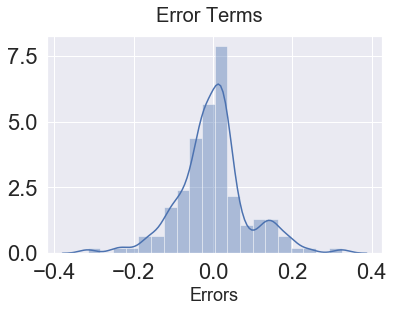

In [447]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [ ]:
# Making Predictions
# Apply Scaling
num_vars = ['enginesize', 'horsepower', 'ohc', 'rotor', 'hatchback', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [452]:
# Making Predictions
# Apply Scaling
vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','cylindernumber','avg_mpg','carlength','carwidth','price']
df_test[vars] = scaler.fit_transform(df_test[vars])

c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amlan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [453]:
df_test.describe()

,curbweight,carlength,carwidth,boreratio,enginesize,wheelbase,horsepower,avg_mpg,cylindernumber,price,...,turbo,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,pricerange_cat
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000
mean,0.371743,0.486741,0.375212,0.667691,0.228835,0.370121,0.359521,0.459824,0.080645,0.209644,...,0.177419,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,1.322581
std,0.222354,0.183964,0.208977,0.228484,0.188416,0.179970,0.252970,0.232966,0.220721,0.210911,...,0.385142,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.695988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.219125,0.389764,0.221053,0.515873,0.126638,0.265306,0.140323,0.259091,0.000000,0.076536,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
50%,0.344065,0.475591,0.326316,0.674603,0.183406,0.327988,0.312903,0.436364,0.000000,0.136847,...,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,0.540726,0.642126,0.421053,0.857143,0.287118,0.482507,0.432258,0.600000,0.000000,0.280049,...,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,2.000000


In [ ]:
#Divide into x_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [457]:
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
X_test_m8 = X_train_rfe8[X_train_rfe8.columns]
#X_test_new = X_test[X_train_rfe8.columns]
X_test_m8.head()

In [461]:
y_pred_m8 = lm8.predict(X_test_m8)

In [ ]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [463]:
len(y_test)

62

In [464]:
len(y_pred_m8)

143

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)